# Linear Regression Practice

In this notebook, I will practice running linear regression in Python. I'm very familiar with running linear regressions in SPSS and STATA, so it will be good to practice setting up models in this format. 

I am going to manually calculate linear regression and use built-in functions from scikit-learn to get extra practice.

The data I am using is on Olympic athletes. I found this dataset on Kaggle. 

Let's get started.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

## Data Preparation

In [2]:
data = pd.read_csv('athlete_events.csv')
data

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


This is a pretty straightforward file, which makes it easy for us! 

We eventually want to run a linear regression. We first need to find some variables that have a linear correlation. 

Let's look just at the data for basketball players.

In [61]:
basketball_data = data[data.Sport == 'Basketball']

## Data Analysis and Visualization

We eventually want to run a linear regression. We can see if basketball players in the Olympics are getting taller over time.

Let's start by visualizing our data.

In [55]:
basketball = basketball_data.groupby('Year').Height.mean().reset_index()
basketball

,Year,Height
0,1936,182.574074
1,1948,185.550725
2,1952,187.600000
3,1956,186.952941
4,1960,188.317708
5,1964,189.920635
6,1968,189.880435
7,1972,193.321053
8,1976,189.760563
9,1980,190.985981


It looks like heights did slowly increase over the past several decades. The average Olympic basketball player in 2016 was almost 10 inches taller than the average Olympic basketball player in 1936. 

We can plot this to see the data. When we run our linear regression we'll plot our line on top of our histogram to see how well it fits the data.

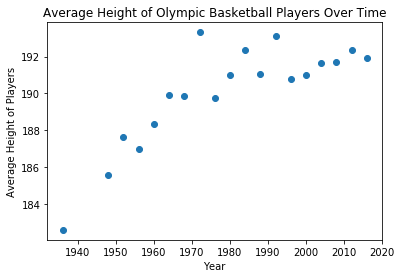

In [56]:
plt.plot(basketball.Year, basketball.Height, 'o')
plt.xlabel('Year')
plt.ylabel('Average Height of Players')
plt.title('Average Height of Olympic Basketball Players Over Time')
plt.show()

That's a pretty clear relationship. It's not quite linear - it looks like the change has been tapering off in recent years. Indeed, humans can't continue to increase in height indefinitely. So, while we shouldn't use this to predict the average height of basketball players in 2050, it can still give us a decent estimate of how much heights have been increasing every year, or what the average height likely was during the years we don't have data on players' heights.

Let's run our linear regression!

### Linear Regression - scikit-learn

Let's start by doing this the easy way - with scikit-learn. Then when we run our linear regression manually we can compare how we did.

In [74]:
X_val = basketball['Year']
X = X_val.values.reshape(-1, 1)
y = basketball['Height']

regr = LinearRegression()
regr.fit(X, y)

print(regr.intercept_, regr.coef_)

-0.719818776506429 [0.09636454]


So our line of best fit will be y = 0.0963x - 0.7198. Let's plot it!

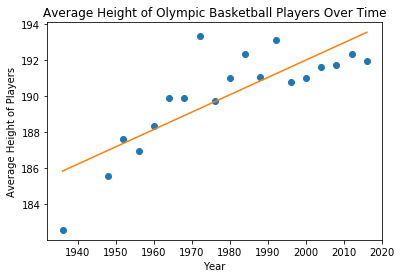

In [58]:
y_predict = regr.predict(X)

plt.plot(basketball.Year, basketball.Height, 'o')
plt.xlabel('Year')
plt.ylabel('Average Height of Players')
plt.title('Average Height of Olympic Basketball Players Over Time')

plt.plot(X, y_predict)

plt.show()

It's not a great line; it's underestimating the change per year earlier in the 1900s and overestimating the change per year in the mid- to late-1990s and 2000s. We predicted this would happen, though. 

Later on I could split up this data into two different categories - historical data and more recent data - as they seem to be following separate trends. From the 1930s to the early 1990s there was a trend of more rapidly increasing heights, and from the mid- to late-1990s on the average heights got much tighter and followed a more slow and steady increase upwards. It would also be interesting to do some research on why this is the case - what happened in the world of basketball or in the Olympics that prompted this change?

Since my goal here is more to practice running regressions using Python and less to actually understand the history of basketball, we'll leave this for now...

Let's run linear regression on the same larger, if slightly wonky, dataset. We'll do it manually this time, though!

### Linear Regression - Manually

We already know that linear regression finds the line of best fit for our data. What scikit-learn is doing when it runs a linear regression for you is it is testing many different y-intercepts and slopes to see which ones produce the smallest loss or error in a process called gradient descent. We need to create functions that calculate our y-intercept and slope gradients. We then need to create a function to define our learning rate - how far down the loss curve we want to go - and our convergence - when we think loss has stopped changing or has slowed down enough. If our learning rate is too small, our line will be very accurate, but it might take too long to run our function. If our learning rate is too large, we'll never reach convergence.

I won't get too much into the math behind this... Let's set up our functions.

In [19]:
def get_b_gradient(x, y, b, m):
    N = len(x)
    diff = 0
    for i in range(N):
        diff += y[i] - (m * x[i] + b)
    b_gradient = (-2 / N) * diff
    return b_gradient

def get_m_gradient(x, y, b, m):
    N = len(x)
    diff = 0
    for i in range(N):
        diff += x[i] * (y[i] - (m * x[i] + b))
    m_gradient = (-2 / N) * diff
    return m_gradient

def step_gradient(current_b, current_m, x, y, learning_rate):
    b_gradient = get_b_gradient(x, y, current_b, current_m)
    m_gradient = get_m_gradient(x, y, current_b, current_m)
    b = current_b - (learning_rate * b_gradient)
    m = current_m - (learning_rate * m_gradient)
    return [b, m]

def gradient_descent(x, y, learning_rate, num_iterations):
    b = 0
    m = 0
    for i in range(num_iterations):
        b, m = step_gradient(b, m, x, y, learning_rate)
    return [b, m]

Let's test it out!

In [78]:
b, m = gradient_descent(X_val, y, 0.0000001, 10000)
print(b, m)

4.8300644762196075e-05 0.09600093890488999


It takes a very small learning rate in order to run without any errors, and it takes quite a while to run, but it works! Our y-intercept and slope are slightly different than what scikit-learn produced, but they're not too far off. Let's plot it. 

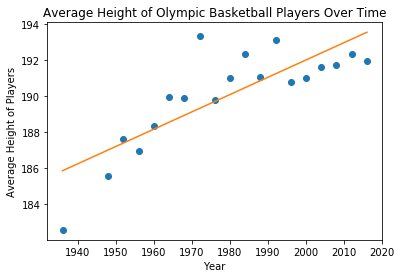

In [82]:
y_predict_manual = [value * m + b for value in X_val]

plt.plot(X_val, y, 'o')
plt.plot(X, y_predict_manual)

plt.xlabel('Year')
plt.ylabel('Average Height of Players')
plt.title('Average Height of Olympic Basketball Players Over Time')

plt.show()

It worked perfectly! When you plot the line produced by scikit-learn on top, you cannot distinguish between the two. So my manual functions work, though using scikit-learn is certainly faster and easier. 

### Predictions

I want to use the line of best fit to make some predictions. We don't have data on average players' height in 1940 and 1944 because the Olympics were canceled due to WWII. If the Olympics had been held, what do we think the average height of players would be for those years?

Let's produce a new line of best fit for our historical data only, excluding the most recent years that follow a different trend.

In [85]:
basketball_historic = basketball[basketball.Year < 1995]

In [87]:
X_hist = basketball_historic['Year']
X_hist = X_hist.values.reshape(-1, 1)
y_hist = basketball_historic['Height']

regr_hist = LinearRegression()
regr_hist.fit(X_hist, y_hist)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

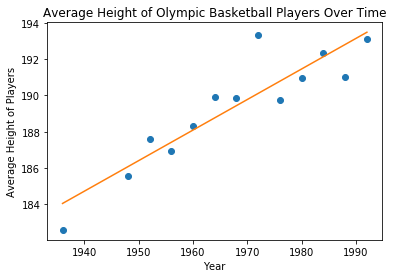

In [89]:
y_hist_predict = regr_hist.predict(X_hist)

plt.plot(X_hist, y_hist, 'o')
plt.xlabel('Year')
plt.ylabel('Average Height of Players')
plt.title('Average Height of Olympic Basketball Players Over Time')

plt.plot(X_hist, y_hist_predict)

plt.show()

Excellent - we can already see that our line is much more accurate for these years! 

To predict what the average heights would have been in 1940 and 1944, we need to know the formula for our line of best fit.

In [90]:
print(regr_hist.intercept_, regr_hist.coef_)

-142.94758178317764 [0.16889656]


In [92]:
height_1940 = regr_hist.coef_ * 1940 + regr_hist.intercept_

height_1944 = regr_hist.coef_ * 1944 + regr_hist.intercept_

print(height_1940, height_1944)

[184.71174835] [185.3873346]


So, we can predict that if the Olympics had been held in 1940 and 1944, the average height of the basketball players would be 184.7 inches and 185.4 inches, respectively.

Now I want to predict what the average height of basketball player will be in the upcoming 2020 Olympics. Again, we need a new line of best fit for the more recent data. 

In [93]:
basketball_recent = basketball[basketball.Year > 1995]

In [94]:
X_rec = basketball_recent['Year']
X_rec = X_rec.values.reshape(-1, 1)
y_rec = basketball_recent['Height']

regr_rec = LinearRegression()
regr_rec.fit(X_rec, y_rec)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

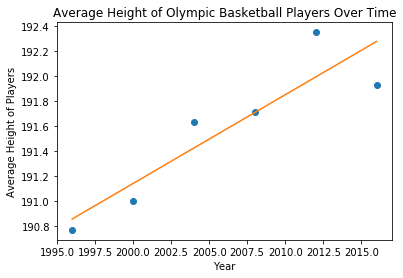

In [95]:
y_rec_predict = regr_rec.predict(X_rec)

plt.plot(X_rec, y_rec, 'o')
plt.xlabel('Year')
plt.ylabel('Average Height of Players')
plt.title('Average Height of Olympic Basketball Players Over Time')

plt.plot(X_rec, y_rec_predict)

plt.show()

Again, this seems to fit much better than our first line that encompassed all of the data. 

Now let's predict what the average height of Olympic basketball players will be in 2020.

In [96]:
print(regr_rec.intercept_, regr_rec.coef_)

49.10255598524961 [0.07101954]


In [97]:
height_2020 = regr_rec.coef_ * 2020 + regr_rec.intercept_

height_2020

array([192.56202943])

We can predict that the average height of basketball players in the 2020 Olympics will be 192.6 inches. 

Lastly, I'd like to know, on average, how much basketball players' heights have been changing over the years. 

We can calculate this quite easily by using the slope.

In [98]:
print(regr_hist.coef_)
print(regr_hist.coef_ * 4)

print(regr_rec.coef_)
print(regr_rec.coef_ * 4)

[0.16889656]
[0.67558625]
[0.07101954]
[0.28407817]


From the 1936 Olympics to the 1992 Olympics, the average height of Olympic basketball players increased at a rate of 0.17 inches per year, or 0.68 inches per 4-year Olympic cycle. 

Starting in the 1990s, this height increase began to slow. From the 1996 Olympics to the 2016 Olympics, the average height of Olympic basketball players increased at a rate of 0.07 inches per year, or 0.28 inches per 4-year Olympic cycle. 